In [1]:
import numpy as np
import matplotlib.pyplot as plt

from covapt_mt.covapt import covariance_model
from covapt_mt.utils import load_config_file

In [150]:
config_dict = load_config_file("config/get_covariance.yaml")

k_data = np.load(config_dict["input_dir"] + config_dict["k_array_file"])
k_0 = k_data["k_0"]
print(config_dict["output_dir"] + config_dict["covariance_file"])
C_data = np.load(config_dict["output_dir"] + config_dict["covariance_file"])
C_G, P_G = [], []
num_zbins = len(C_data.files)
num_tracers = 3
num_spectra = 6
num_kbins = len(k_0)

print(k_0)

for z in range(num_zbins):
    C_G.append(C_data["zbin_"+str(z)])
    P_G.append(np.linalg.inv(C_G[z]))

/home/joeadamo/Research/SPHEREx/covapt_mt/data/output_data/cov_test.npz
[0.00694 0.01482 0.0227  0.03058 0.03846 0.04634 0.05422 0.0621  0.06998
 0.07786 0.08574 0.09362 0.1015  0.10938 0.11726 0.12514 0.13302 0.1409
 0.14878 0.15666 0.16454 0.17242 0.1803  0.18818 0.19606]


In [151]:
def CorMat(cov):
    rms = np.sqrt(np.diag(cov))
    cor = np.copy(cov)
    for i in range(cov.shape[0]):
        for j in range(cov.shape[0]):
            cor[i,j] = cov[i,j]/(rms[i]*rms[j])
    return cor

ERROR! Covariance matrix is not positive definite!


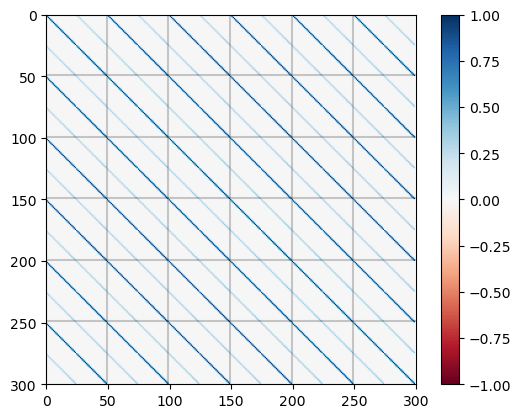

In [152]:
for z in range(num_zbins):

    try:
        L = np.linalg.cholesky(C_G[z])
        print("Covariance matrix is positive definite! :)")
    except:
        print("ERROR! Covariance matrix is not positive definite!")
        
    plt.figure()
    corr = CorMat(C_G[z])
    img = plt.imshow(corr, vmin=-1, vmax=1, cmap="RdBu")
    for i in range(num_spectra):
        plt.axvline(i*num_kbins*2 - 1, c="black", alpha=0.2)
        plt.axhline(i*num_kbins*2 - 1, c="black", alpha=0.2)
    plt.xlim(0, num_spectra*2*num_kbins)
    plt.ylim(num_spectra*2*num_kbins, 0)
    plt.colorbar()

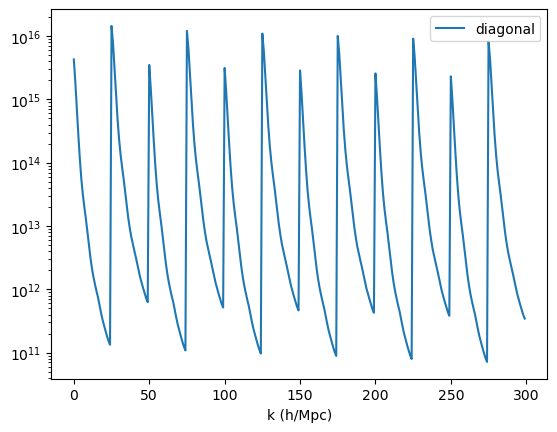

In [153]:
plt.plot(np.diag(C_G[0]), label="diagonal")
#plt.plot(np.diag(C_G[0])[num_kbins:], label="(2, 2) diagonal")
#plt.xscale("log")
plt.yscale("log")

plt.xlabel("k (h/Mpc)")
plt.legend()

there are 103 negative eigenvalues!
there are 0 eigenvalues equal to 0!


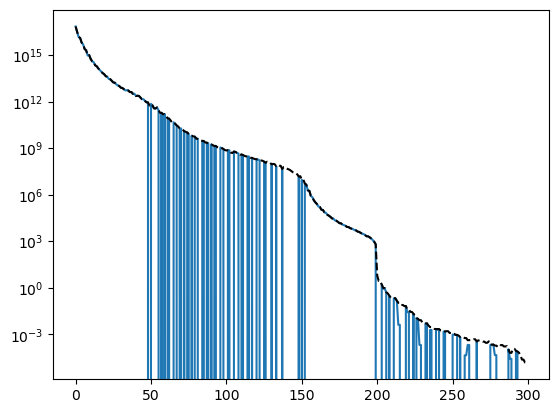

In [156]:
for z in range(num_zbins):
    eigvals_true, __ = np.linalg.eig(C_G[z])
    
    print("there are {:0.0f} negative eigenvalues!".format(len(eigvals_true[(eigvals_true < 0)])))
    print("there are {:0.0f} eigenvalues equal to 0!".format(len(eigvals_true[(eigvals_true == 0)])))
    plt.figure()
    plt.plot(eigvals_true)
    plt.plot(abs(eigvals_true), c="black", ls="--")
    plt.yscale("log")

ERROR! Covariance matrix is not positive definite!
there are 46 negative eigenvalues!


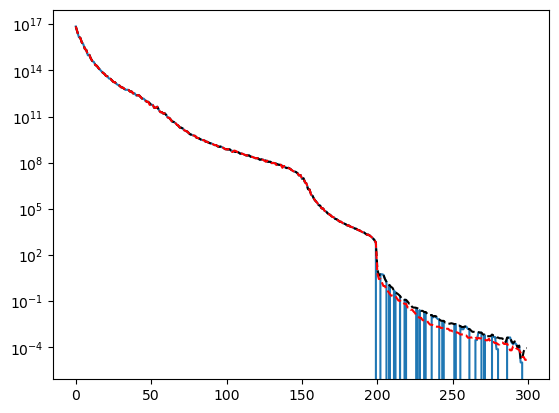

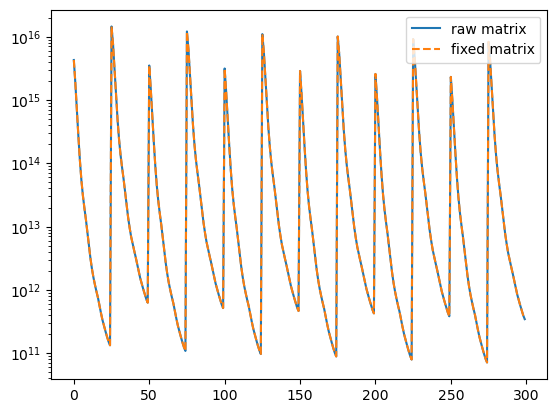

In [157]:
# TEMP FIX: manually set eigenvalues to positive

C_G_fixed = []
for z in range(num_zbins):
    eigvals, Q = np.linalg.eig(C_G[z])
    C_fixed = Q @ (np.diag(abs(eigvals)) @ np.linalg.inv(Q))

    try:
        L = np.linalg.cholesky(C_fixed)
        print("Covariance matrix is positive definite! :)")
    except:
        print("ERROR! Covariance matrix is not positive definite!")
    
    eigvals, Q = np.linalg.eig(C_fixed)
    print("there are {:0.0f} negative eigenvalues!".format(len(eigvals[(eigvals < 0)])))
    plt.figure()
    plt.plot(eigvals)
    plt.plot(abs(eigvals), c="black", ls="--")
    plt.plot(abs(eigvals_true), c="red", ls="--")
    plt.yscale("log")
    
    plt.figure()
    plt.plot(np.diag(C_G[0]), label="raw matrix")
    plt.plot(np.diag(C_fixed), ls="--", label="fixed matrix")
    plt.yscale("log")
    plt.legend()

(1, 6, 2, 25) (1, 6, 2, 25)


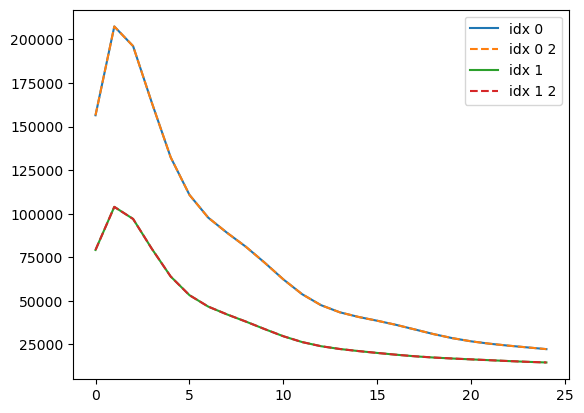

In [41]:
pk = np.load("/home/joeadamo/Research/SPHEREx/spherex_emu/data/ps_fid.npy")
pk_2 = np.load("/home/joeadamo/Research/SPHEREx/covapt_mt/data/input_data/ps_emu_test.npy")
print(pk.shape, pk_2.shape)

plt.plot(pk[0,0,0,:], label="idx 0")
plt.plot(pk_2[0,0,0,:], ls="--", label="idx 0 2")
plt.plot(pk[0,0,1,:], label="idx 1")
plt.plot(pk_2[0,0,1,:], ls="--", label="idx 1 2")
plt.legend()